In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/df_processed.csv')
df

,Quantidadedereprovaesnocurso4reprovaesperdadevaga,em_risco,Sala_FourCornersA1,Sala_FourCornersA2,Sala_FourCornersA3,Sala_FourCornersB1,Sala_FourCornersB2,Sala_FourCornersB3,Sala_FourCornersC1,Sala_FourCornersC2,...,Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Estudos,Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Gravidezmulherouparceiroa,Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Horrio,Sealunonoestmaisfrequentandoasaulasescolhaomotivo_MudanadeUnidade,Sealunonoestmaisfrequentandoasaulasescolhaomotivo_MudanadenveldentrodaUnidade,Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Problemasfinanceiros,Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Problemaspessoais,Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Sade,Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Semretornodoestudante,Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Trabalho
0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1973,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1974,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1975,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
X = df.drop(columns=['em_risco'])
y = df['em_risco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Árvore de decisão

In [4]:
modelo = DecisionTreeClassifier(criterion="entropy",
max_depth=4, min_samples_split=10, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=10,
                       random_state=42)

In [5]:
y_pred = modelo.predict(X_test)
print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.9570707070707071

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.35      0.51        26
           1       0.96      1.00      0.98       370

    accuracy                           0.96       396
   macro avg       0.98      0.67      0.75       396
weighted avg       0.96      0.96      0.95       396



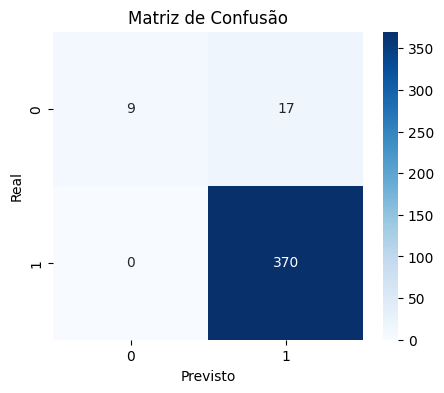

In [6]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [7]:
importancias = pd.Series(modelo.feature_importances_, index=X.columns)
importancias = (importancias.sort_values(ascending=False)).index

print("Importância das Variáveis:")
print(importancias[0:5])

Importância das Variáveis:
Index(['Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Sade',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_MudanadeUnidade',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Gravidezmulherouparceiroa',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_MudanadenveldentrodaUnidade',
       'Quantidadedereprovaesnocurso4reprovaesperdadevaga'],
      dtype='object')


# Random Forest

In [12]:
modelo_rf = RandomForestClassifier(n_estimators=100,
max_depth=6, min_samples_split=5, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_split=5, random_state=42)

In [13]:
y_pred = modelo_rf.predict(X_test)
print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.946969696969697

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.19      0.32        26
           1       0.95      1.00      0.97       370

    accuracy                           0.95       396
   macro avg       0.97      0.60      0.65       396
weighted avg       0.95      0.95      0.93       396



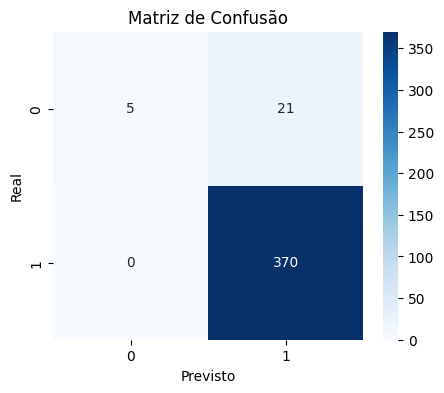

In [14]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [15]:
importancias = pd.Series(modelo_rf.feature_importances_, index=X.columns)
importancias = (importancias.sort_values(ascending=False)).index

print("Importância das Variáveis:")
print(importancias[0:7])

Importância das Variáveis:
Index(['Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Sade',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Semretornodoestudante',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_MudanadeUnidade',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Gravidezmulherouparceiroa',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_MudanadenveldentrodaUnidade',
       'Quantidadedereprovaesnocurso4reprovaesperdadevaga',
       'Statusalunosemestreanterior_Aprovado'],
      dtype='object')


In [16]:
print(y.value_counts(normalize=True))

em_risco
1    0.934244
0    0.065756
Name: proportion, dtype: float64


In [17]:
sm = SMOTE(random_state=42, k_neighbors=2)
X_res, y_res = sm.fit_resample(X, y)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

In [18]:
y_pred_rf = rf.predict(X_res)
print("\nAcurácia:", accuracy_score(y_res, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_res, y_pred_rf))


Acurácia: 0.8982133188955063

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1847
           1       0.96      0.84      0.89      1847

    accuracy                           0.90      3694
   macro avg       0.90      0.90      0.90      3694
weighted avg       0.90      0.90      0.90      3694



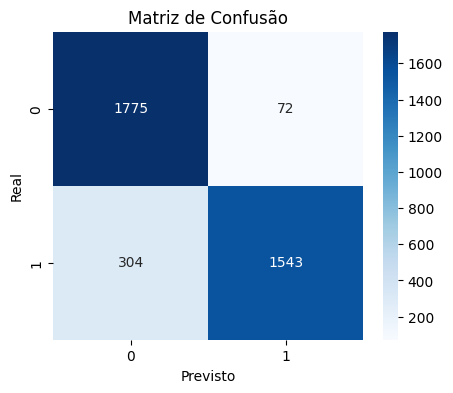

In [19]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_res, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [20]:
importancias = pd.Series(rf.feature_importances_, index=X.columns)
importancias = (importancias.sort_values(ascending=False)).index

print("Importância das Variáveis:")
print(importancias[0:7])

Importância das Variáveis:
Index(['Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Semretornodoestudante',
       'Sala_FourCornersC1', 'Sala_FourCornersB1',
       'Statusalunosemestreanterior_Aprovado',
       'Quantidadedereprovaesnocurso4reprovaesperdadevaga',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Sade',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_MudanadeUnidade'],
      dtype='object')


# XBoost

In [21]:
peso_balanceado = (y == 0).sum() / (y == 1).sum()
xgb = XGBClassifier(scale_pos_weight=peso_balanceado, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:23:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [22]:
y_pred_xgb = xgb.predict(X_test)
print("\nAcurácia:", accuracy_score(y_test, y_pred_xgb))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_xgb))


Acurácia: 0.7651515151515151

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.18      0.73      0.29        26
           1       0.98      0.77      0.86       370

    accuracy                           0.77       396
   macro avg       0.58      0.75      0.57       396
weighted avg       0.92      0.77      0.82       396



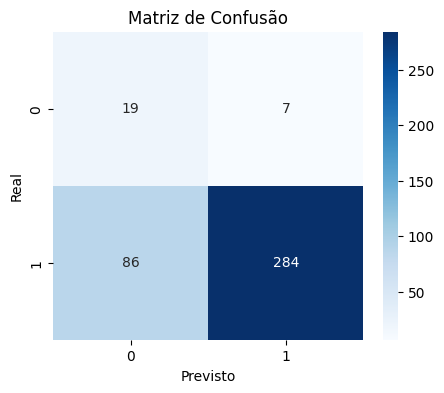

In [23]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [24]:
importancias = pd.Series(xgb.feature_importances_, index=X.columns)
importancias = (importancias.sort_values(ascending=False)).index

print("Importância das Variáveis:")
print(importancias[0:6])

Importância das Variáveis:
Index(['Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Gravidezmulherouparceiroa',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_MudanadenveldentrodaUnidade',
       'Sala_FourCornersI1',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Semretornodoestudante',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_MudanadeUnidade',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Sade'],
      dtype='object')


# GBM

In [25]:
gbm = GradientBoostingClassifier(n_estimators=200,
learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [26]:
y_pred = gbm.predict(X_test)
print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.9595959595959596

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.38      0.56        26
           1       0.96      1.00      0.98       370

    accuracy                           0.96       396
   macro avg       0.98      0.69      0.77       396
weighted avg       0.96      0.96      0.95       396



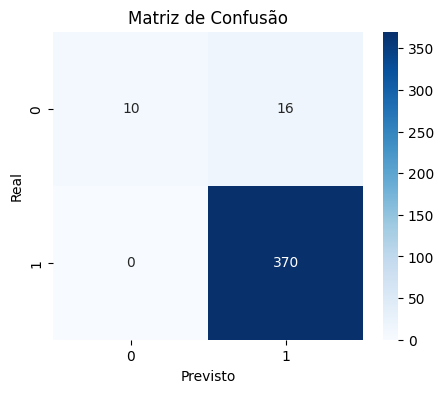

In [27]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [28]:
importancias = pd.Series(gbm.feature_importances_, index=X.columns)
importancias = (importancias.sort_values(ascending=False)).index

print("Importância das Variáveis:")
print(importancias[0:6])

Importância das Variáveis:
Index(['Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Sade',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_MudanadeUnidade',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Gravidezmulherouparceiroa',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_MudanadenveldentrodaUnidade',
       'Quantidadedereprovaesnocurso4reprovaesperdadevaga',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Semretornodoestudante'],
      dtype='object')


In [29]:
lgbm = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.1,
max_depth=-1, subsample=0.8, colsample_bytree=0.8, random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1477, number of negative: 104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.934219 -> initscore=2.653377
[LightGBM] [Info] Start training from score 2.653377
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(colsample_bytree=0.8, n_estimators=300, random_state=42,
               subsample=0.8)

In [30]:
y_pred = lgbm.predict(X_test)
print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.9267676767676768

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.20      0.04      0.06        26
           1       0.94      0.99      0.96       370

    accuracy                           0.93       396
   macro avg       0.57      0.51      0.51       396
weighted avg       0.89      0.93      0.90       396



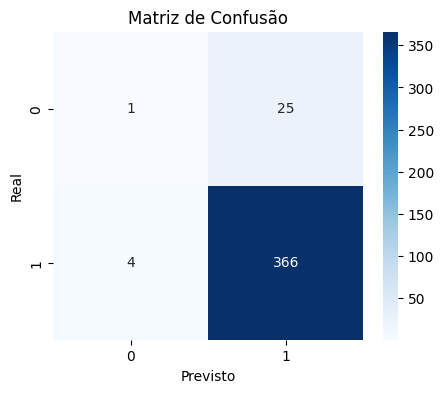

In [31]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [32]:
importancias = pd.Series(lgbm.feature_importances_, index=X.columns)
importancias = (importancias.sort_values(ascending=False)).index

print("Importância das Variáveis:")
print(importancias[0:6])

Importância das Variáveis:
Index(['Quantidadedereprovaesnocurso4reprovaesperdadevaga',
       'Sealunonoestmaisfrequentandoasaulasescolhaomotivo_Semretornodoestudante',
       'Sala_FourCornersB1', 'Statusalunosemestreanterior_Aprovado',
       'Sala_FourCornersC1', 'Statusalunosemestreanterior_AlunoNovo'],
      dtype='object')


# SVM

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
svm = SVC(kernel="rbf", C=1.0, gamma="scale",
probability=True, random_state=42)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [47]:
y_pred = svm.predict(X_test)
print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.952020202020202

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.27      0.42        26
           1       0.95      1.00      0.97       370

    accuracy                           0.95       396
   macro avg       0.98      0.63      0.70       396
weighted avg       0.95      0.95      0.94       396



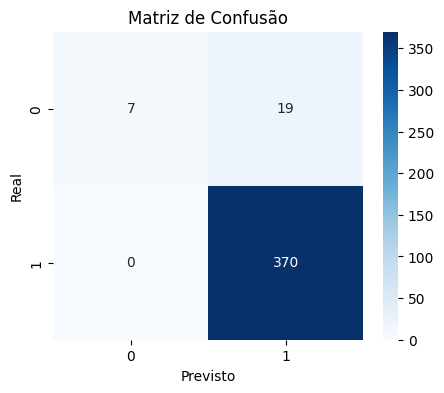

In [48]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()